In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

import numpy as np
from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, \
    TimeSeriesResampler
import seaborn as sns
from tslearn.utils import to_time_series_dataset
from tslearn.clustering import silhouette_score

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import sklearn.cluster

import os
from yellowbrick.cluster import SilhouetteVisualizer

import math
import scipy

C:\Users\met48\AppData\Local\Temp\ipykernel_9488\3248349978.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
C:\Users\met48\AppData\Local\anaconda3\Lib\site-packages\tslearn\bases\bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


## Visualization Function

In [54]:
def ts_cluster_visualization(y_pred, df, n_clusters, plot_title):
    ts_size = df.shape[1]
    ts_max = df.max()
    plt.figure()
    for cluster in range(n_clusters):
        plt.subplot(4, math.ceil(n_clusters/4), cluster+1)
        for ts in df[y_pred == cluster]:
            plt.plot(ts.ravel(), "k-", alpha=.2)
        plt.plot(np.mean(df[y_pred == cluster], axis=0), "r-")
        plt.xlim(0, ts_size)
        plt.ylim(0, ts_max)
        plt.text(0.55, 0.35,'Cluster %d' % (cluster),
                 transform=plt.gca().transAxes)
        if cluster == 1:
            plt.title(plot_title)      
    plt.tight_layout()
    plt.show()

## Distance Function

In [4]:
def ts_cluster_distance(y_pred, df, n_clusters, distance_measure):
    distances = list()
    for cluster in range(n_clusters):
        cluster_center = np.mean(df[y_pred == cluster], axis=0)
        for ts in df[y_pred == cluster]:
            if(distance_measure == "Euclidean"):
                diff = np.sqrt(np.sum((ts.ravel() - cluster_center)**2))
                distances.append(diff)
    return np.mean(distances)

## Bank Reserves

In [45]:
label_results = pd.read_csv('bank_reserves_results.csv', index_col=0)
br_poor = pd.read_csv("SimData/bank_reserves_outputs_poor.csv", header=None)
br_poor_ts = to_time_series_dataset(br_poor)

In [25]:
distance_br_pca_kmeans = ts_cluster_distance(label_results.loc["PCA_KMeans"].to_numpy(), br_poor_ts, 7, "Euclidean")
distance_br_pca_agglom = ts_cluster_distance(label_results.loc["PCA_Agglom"].to_numpy(), br_poor_ts, 7, "Euclidean")
distance_br_pca_spectral = ts_cluster_distance(label_results.loc["PCA_Spectral"].to_numpy(), br_poor_ts, 7, "Euclidean")

distance_br_dae_kmeans = ts_cluster_distance(label_results.loc["DAE_KMeans"].to_numpy(), br_poor_ts, 7, "Euclidean")
distance_br_dae_agglom = ts_cluster_distance(label_results.loc["DAE_Agglom"].to_numpy(), br_poor_ts, 7, "Euclidean")
distance_br_dae_spectral = ts_cluster_distance(label_results.loc["DAE_Spectral"].to_numpy(), br_poor_ts, 7, "Euclidean")

distance_br_dcae_kmeans = ts_cluster_distance(label_results.loc["DCAE_KMeans"].to_numpy(), br_poor_ts, 7, "Euclidean")
distance_br_dcae_agglom = ts_cluster_distance(label_results.loc["DCAE_Agglom"].to_numpy(), br_poor_ts, 7, "Euclidean")
distance_br_dcae_spectral = ts_cluster_distance(label_results.loc["DCAE_Spectral"].to_numpy(), br_poor_ts, 7, "Euclidean")

In [28]:
br_results_poor_df = pd.DataFrame({
    "Feature": ["PCA", "PCA", "PCA", "DAE", "DAE", "DAE", "DCAE", "DCAE", "DCAE"],
    "Cluster": ["KMeans", "Agglomerative", "Spectral", "KMeans", "Agglomerative", "Spectral", "KMeans", "Agglomerative", "Spectral"],
    "Value": [distance_br_pca_kmeans, distance_br_pca_agglom, distance_br_pca_spectral, 
              distance_br_dae_kmeans, distance_br_dae_agglom, distance_br_dae_spectral,
              distance_br_dcae_kmeans, distance_br_dcae_agglom, distance_br_dcae_spectral]
})

In [30]:
br_poor = pd.read_csv("SimData/bank_reserves_outputs_middle.csv", header=None)
br_poor_ts = to_time_series_dataset(br_poor)

In [31]:
distance_br_pca_kmeans = ts_cluster_distance(label_results.loc["PCA_KMeans"].to_numpy(), br_poor_ts, 7, "Euclidean")
distance_br_pca_agglom = ts_cluster_distance(label_results.loc["PCA_Agglom"].to_numpy(), br_poor_ts, 7, "Euclidean")
distance_br_pca_spectral = ts_cluster_distance(label_results.loc["PCA_Spectral"].to_numpy(), br_poor_ts, 7, "Euclidean")

distance_br_dae_kmeans = ts_cluster_distance(label_results.loc["DAE_KMeans"].to_numpy(), br_poor_ts, 7, "Euclidean")
distance_br_dae_agglom = ts_cluster_distance(label_results.loc["DAE_Agglom"].to_numpy(), br_poor_ts, 7, "Euclidean")
distance_br_dae_spectral = ts_cluster_distance(label_results.loc["DAE_Spectral"].to_numpy(), br_poor_ts, 7, "Euclidean")

distance_br_dcae_kmeans = ts_cluster_distance(label_results.loc["DCAE_KMeans"].to_numpy(), br_poor_ts, 7, "Euclidean")
distance_br_dcae_agglom = ts_cluster_distance(label_results.loc["DCAE_Agglom"].to_numpy(), br_poor_ts, 7, "Euclidean")
distance_br_dcae_spectral = ts_cluster_distance(label_results.loc["DCAE_Spectral"].to_numpy(), br_poor_ts, 7, "Euclidean")

In [32]:
br_results_middle_df = pd.DataFrame({
    "Feature": ["PCA", "PCA", "PCA", "DAE", "DAE", "DAE", "DCAE", "DCAE", "DCAE"],
    "Cluster": ["KMeans", "Agglomerative", "Spectral", "KMeans", "Agglomerative", "Spectral", "KMeans", "Agglomerative", "Spectral"],
    "Value": [distance_br_pca_kmeans, distance_br_pca_agglom, distance_br_pca_spectral, 
              distance_br_dae_kmeans, distance_br_dae_agglom, distance_br_dae_spectral,
              distance_br_dcae_kmeans, distance_br_dcae_agglom, distance_br_dcae_spectral]
})

In [33]:
br_results_middle_df

,Feature,Cluster,Value
0,PCA,KMeans,7807.927980
1,PCA,Agglomerative,7746.804364
2,PCA,Spectral,7597.069312
3,DAE,KMeans,7588.486963
4,DAE,Agglomerative,7586.074503
5,DAE,Spectral,7594.094847
6,DCAE,KMeans,7590.114340
7,DCAE,Agglomerative,7686.050941
8,DCAE,Spectral,7591.325372


In [34]:
br_poor = pd.read_csv("SimData/bank_reserves_outputs_rich.csv", header=None)
br_poor_ts = to_time_series_dataset(br_poor)

In [35]:
distance_br_pca_kmeans = ts_cluster_distance(label_results.loc["PCA_KMeans"].to_numpy(), br_poor_ts, 7, "Euclidean")
distance_br_pca_agglom = ts_cluster_distance(label_results.loc["PCA_Agglom"].to_numpy(), br_poor_ts, 7, "Euclidean")
distance_br_pca_spectral = ts_cluster_distance(label_results.loc["PCA_Spectral"].to_numpy(), br_poor_ts, 7, "Euclidean")

distance_br_dae_kmeans = ts_cluster_distance(label_results.loc["DAE_KMeans"].to_numpy(), br_poor_ts, 7, "Euclidean")
distance_br_dae_agglom = ts_cluster_distance(label_results.loc["DAE_Agglom"].to_numpy(), br_poor_ts, 7, "Euclidean")
distance_br_dae_spectral = ts_cluster_distance(label_results.loc["DAE_Spectral"].to_numpy(), br_poor_ts, 7, "Euclidean")

distance_br_dcae_kmeans = ts_cluster_distance(label_results.loc["DCAE_KMeans"].to_numpy(), br_poor_ts, 7, "Euclidean")
distance_br_dcae_agglom = ts_cluster_distance(label_results.loc["DCAE_Agglom"].to_numpy(), br_poor_ts, 7, "Euclidean")
distance_br_dcae_spectral = ts_cluster_distance(label_results.loc["DCAE_Spectral"].to_numpy(), br_poor_ts, 7, "Euclidean")

In [36]:
br_results_rich_df = pd.DataFrame({
    "Feature": ["PCA", "PCA", "PCA", "DAE", "DAE", "DAE", "DCAE", "DCAE", "DCAE"],
    "Cluster": ["KMeans", "Agglomerative", "Spectral", "KMeans", "Agglomerative", "Spectral", "KMeans", "Agglomerative", "Spectral"],
    "Value": [distance_br_pca_kmeans, distance_br_pca_agglom, distance_br_pca_spectral, 
              distance_br_dae_kmeans, distance_br_dae_agglom, distance_br_dae_spectral,
              distance_br_dcae_kmeans, distance_br_dcae_agglom, distance_br_dcae_spectral]
})

In [37]:
br_results_rich_df

,Feature,Cluster,Value
0,PCA,KMeans,4190.254775
1,PCA,Agglomerative,4177.940803
2,PCA,Spectral,4147.436889
3,DAE,KMeans,4152.373717
4,DAE,Agglomerative,4152.123627
5,DAE,Spectral,4153.372245
6,DCAE,KMeans,4153.802795
7,DCAE,Agglomerative,4170.820159
8,DCAE,Spectral,4154.467995


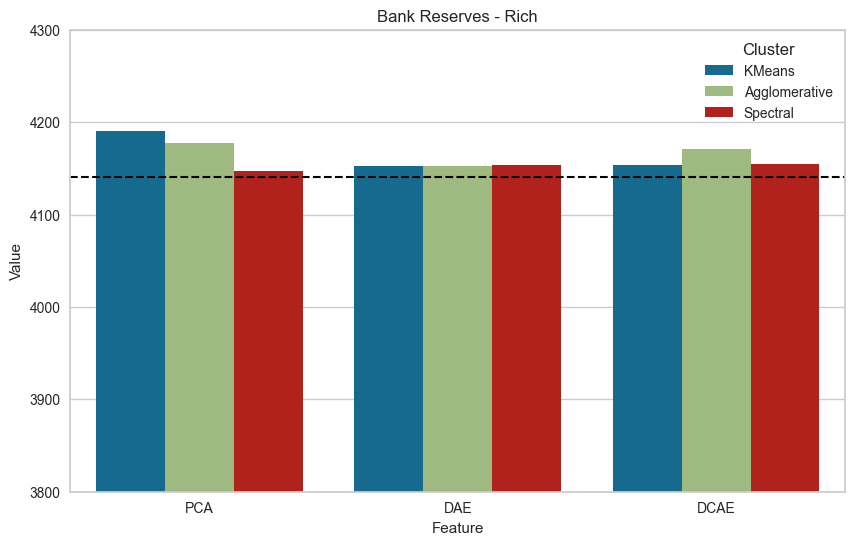

In [74]:
plt.figure(figsize=(10, 6))
sns.barplot(data=br_results_rich_df, x="Feature", y="Value", hue="Cluster")

# Customize the plot
plt.xlabel("Feature")
plt.ylabel("Value")
plt.title("Bank Reserves - Rich")
plt.legend(title="Cluster")
plt.ylim(3800, 4300)
plt.axhline(y=4140.500025369278, color='black', linestyle='--', linewidth=1.5, label="Baseline")
plt.savefig("bank_reserves_rich_overall.png", format="png")
plt.show()

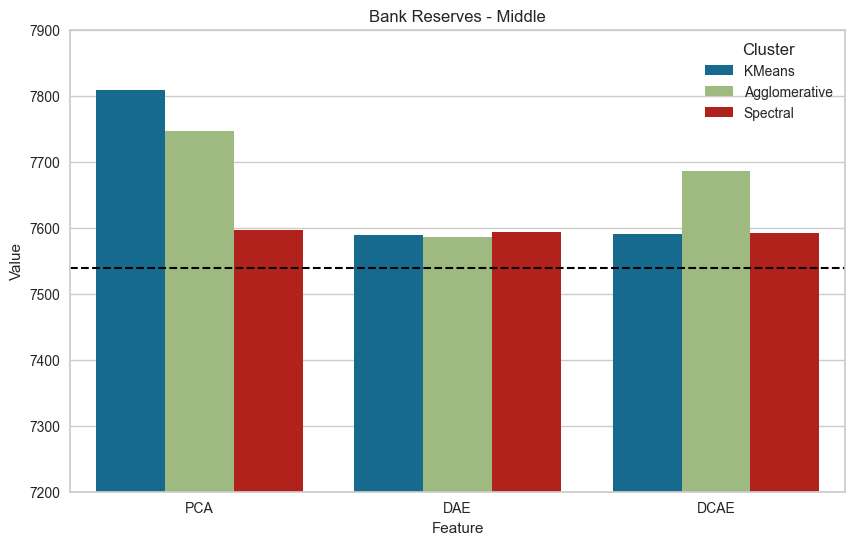

In [73]:
plt.figure(figsize=(10, 6))
sns.barplot(data=br_results_middle_df, x="Feature", y="Value", hue="Cluster")

# Customize the plot
plt.xlabel("Feature")
plt.ylabel("Value")
plt.title("Bank Reserves - Middle")
plt.legend(title="Cluster")
plt.ylim(7200, 7900)
plt.axhline(y=7538.885424504235, color='black', linestyle='--', linewidth=1.5, label="Baseline")
plt.savefig("bank_reserves_middle_overall.png", format="png")
plt.show()

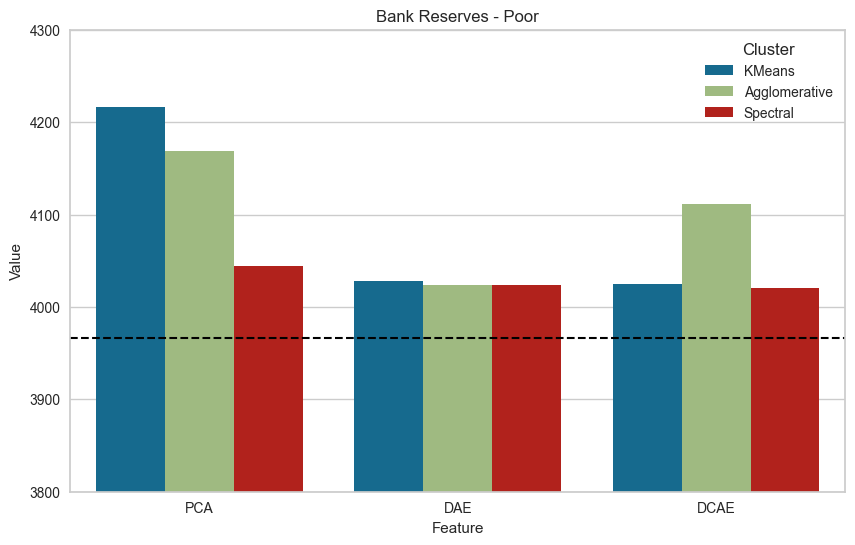

In [75]:
plt.figure(figsize=(10, 6))
sns.barplot(data=br_results_poor_df, x="Feature", y="Value", hue="Cluster")

# Customize the plot
plt.xlabel("Feature")
plt.ylabel("Value")
plt.title("Bank Reserves - Poor")
plt.legend(title="Cluster")
plt.ylim(3800, 4300)
plt.axhline(y=3966.206787344828, color='black', linestyle='--', linewidth=1.5, label="Baseline")
plt.savefig("bank_reserves_poor_overall.png", format="png")
plt.show()

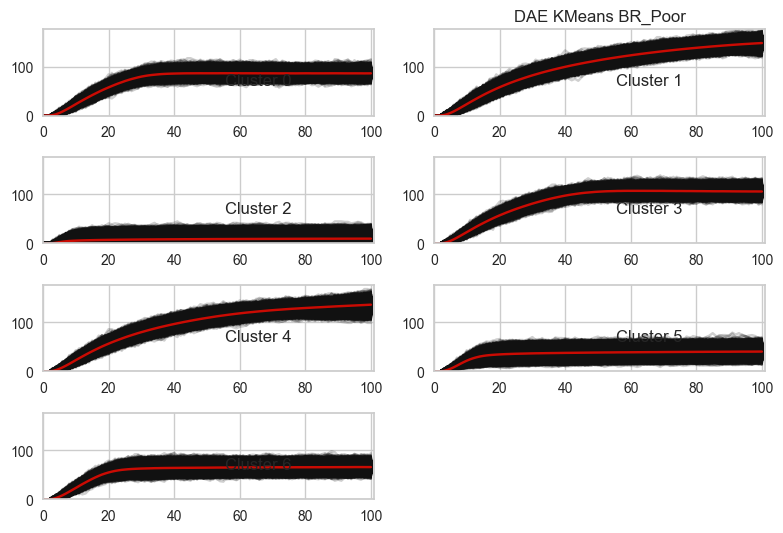

In [55]:
ts_cluster_visualization(label_results.loc["DAE_KMeans"].to_numpy(), br_poor_ts, 7, "DAE KMeans BR_Poor")

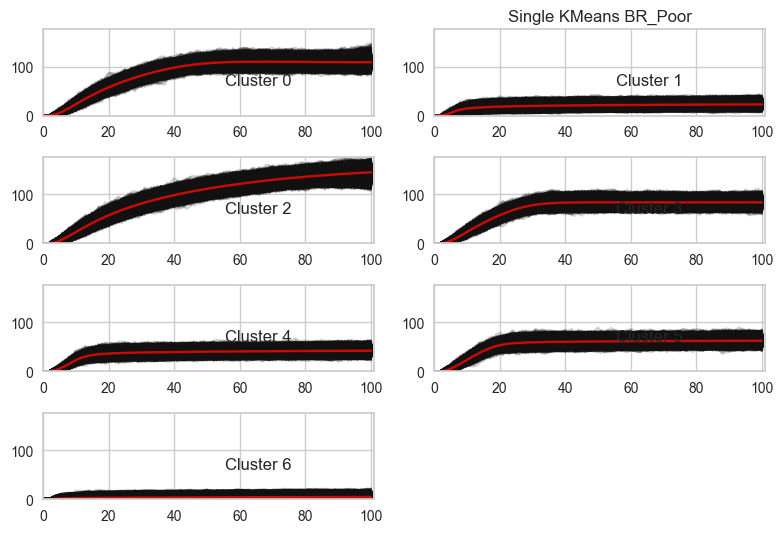

In [56]:
ts_cluster_visualization(y_pred, br_poor_ts, 7, "Single KMeans BR_Poor")

In [57]:
br = pd.read_csv("SimData/bank_reserves_outputs_rich.csv", header=None)
X_train = to_time_series_dataset(br)
seed=0
km = TimeSeriesKMeans(n_clusters=7, verbose=True, random_state=seed)
y_pred = km.fit_predict(X_train)
print("Rich baseline is: ", ts_cluster_distance(y_pred, X_train, 7, "Euclidean"))

8080.181 --> 4685.969 --> 4602.256 --> 4574.634 --> 4560.540 --> 4552.270 --> 4547.319 --> 4544.027 --> 4542.011 --> 4540.767 --> 4539.932 --> 4539.273 --> 4538.748 --> 4538.250 --> 4537.798 --> 4537.378 --> 4536.968 --> 4536.618 --> 4536.336 --> 4536.053 --> 4535.780 --> 4535.533 --> 4535.317 --> 4535.112 --> 4534.944 --> 4534.810 --> 4534.721 --> 4534.621 --> 4534.521 --> 4534.430 --> 4534.342 --> 4534.265 --> 4534.180 --> 4534.075 --> 4534.001 --> 4533.943 --> 4533.886 --> 4533.840 --> 4533.798 --> 4533.760 --> 4533.729 --> 4533.709 --> 4533.694 --> 4533.673 --> 4533.655 --> 4533.643 --> 4533.631 --> 4533.617 --> 4533.601 --> 4533.583 --> 
Rich baseline is:  4140.500025369278


In [58]:
br = pd.read_csv("SimData/bank_reserves_outputs_middle.csv", header=None)
X_train = to_time_series_dataset(br)
seed=0
km = TimeSeriesKMeans(n_clusters=7, verbose=True, random_state=seed)
y_pred = km.fit_predict(X_train)
print("Middle baseline is: ", ts_cluster_distance(y_pred, X_train, 7, "Euclidean"))

18799.007 --> 12499.695 --> 12178.917 --> 12094.980 --> 12068.560 --> 12056.527 --> 12048.891 --> 12043.125 --> 12038.182 --> 12034.266 --> 12031.427 --> 12028.632 --> 12026.356 --> 12024.494 --> 12022.663 --> 12020.806 --> 12019.590 --> 12018.584 --> 12017.665 --> 12016.806 --> 12016.117 --> 12015.622 --> 12015.223 --> 12014.882 --> 12014.620 --> 12014.394 --> 12014.167 --> 12013.973 --> 12013.819 --> 12013.571 --> 12013.389 --> 12013.241 --> 12013.106 --> 12013.005 --> 12012.921 --> 12012.845 --> 12012.777 --> 12012.674 --> 12012.573 --> 12012.466 --> 12012.360 --> 12012.291 --> 12012.244 --> 12012.199 --> 12012.173 --> 12012.138 --> 12012.097 --> 12012.051 --> 12012.005 --> 12011.971 --> 
Middle baseline is:  7538.885424504235


In [59]:
br = pd.read_csv("SimData/bank_reserves_outputs_poor.csv", header=None)
X_train = to_time_series_dataset(br)
seed=0
km = TimeSeriesKMeans(n_clusters=7, verbose=True, random_state=seed)
y_pred = km.fit_predict(X_train)
print("Poor baseline is: ", ts_cluster_distance(y_pred, X_train, 7, "Euclidean"))

6845.566 --> 4604.176 --> 4250.442 --> 4113.227 --> 4046.227 --> 4010.207 --> 3985.459 --> 3965.970 --> 3951.350 --> 3939.351 --> 3929.787 --> 3921.841 --> 3914.576 --> 3908.387 --> 3903.080 --> 3898.241 --> 3894.126 --> 3890.311 --> 3887.155 --> 3884.613 --> 3882.513 --> 3880.644 --> 3878.897 --> 3877.187 --> 3875.652 --> 3874.221 --> 3873.044 --> 3872.038 --> 3871.159 --> 3870.455 --> 3869.922 --> 3869.449 --> 3869.075 --> 3868.768 --> 3868.488 --> 3868.225 --> 3868.025 --> 3867.894 --> 3867.769 --> 3867.634 --> 3867.515 --> 3867.397 --> 3867.303 --> 3867.212 --> 3867.126 --> 3867.054 --> 3866.987 --> 3866.929 --> 3866.872 --> 3866.819 --> 
Poor baseline is:  3966.206787344828


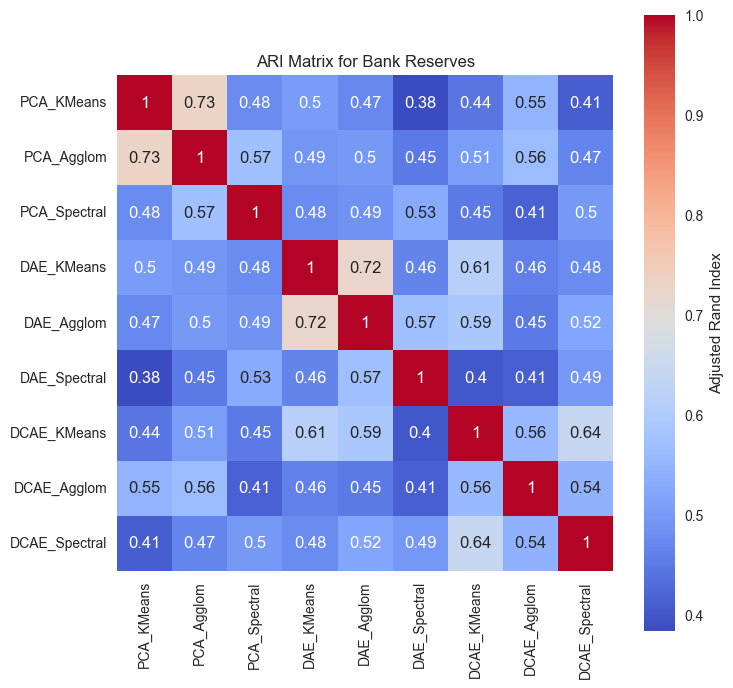

In [81]:
from sklearn.metrics import adjusted_rand_score

vector_names = ["PCA_KMeans",
          "PCA_Agglom",
          "PCA_Spectral",
          "DAE_KMeans",
          "DAE_Agglom",
          "DAE_Spectral",
          "DCAE_KMeans",
          "DCAE_Agglom",
          "DCAE_Spectral"]
                
vectors = [label_results.loc["PCA_KMeans"].to_numpy(), 
          label_results.loc["PCA_Agglom"].to_numpy(),
          label_results.loc["PCA_Spectral"].to_numpy(),
          label_results.loc["DAE_KMeans"].to_numpy(),
          label_results.loc["DAE_Agglom"].to_numpy(),
          label_results.loc["DAE_Spectral"].to_numpy(),
          label_results.loc["DCAE_KMeans"].to_numpy(),
          label_results.loc["DCAE_Agglom"].to_numpy(),
          label_results.loc["DCAE_Spectral"].to_numpy()]  

ari_matrix = np.zeros((9, 9))

for i in range(9):
    for j in range(9):
        ari_matrix[i, j] = adjusted_rand_score(vectors[i], vectors[j])
        
ari_df = pd.DataFrame(ari_matrix, index=vector_names, columns=vector_names)

plt.figure(figsize=(8, 8))
sns.heatmap(ari_df, annot=True, cmap="coolwarm", square=True, cbar_kws={"label": "Adjusted Rand Index"})
plt.title("ARI Matrix for Bank Reserves")
plt.savefig("bank_reserves_ari_matrix.png", format="png")
plt.show()